Fully connected (Multi Layer Perceptron)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

def get_labels(proba):
    return (proba >= 0.5) * 1

In [ ]:
class RegularizedNeuralNetwork:

    def __init__(self, layers_size, lr, lambd):
        
        # +1 -> add bias unit
        self.w0 = np.random.rand(layers_size[0] + 1 , layers_size[1]) * 10 - 5
        self.w1 = np.random.rand(layers_size[1] + 1 , layers_size[2]) * 10 - 5
        self.w2 = np.random.rand(layers_size[2] + 1 , layers_size[3]) * 10 - 5
        self.w3 = np.random.rand(layers_size[3] + 1 , layers_size[4]) * 10 - 5
        # new layers

        self.lr = lr
        self.lambd = lambd
        
    def forward_propogation(self, features):
        m, n = features.shape

        self.a0 = features
        self.a0 = np.hstack((np.ones((self.a0.shape[0], 1)), self.a0))

        self.a1 = sigmoid(self.a0 @ self.w0)
        self.a1 = np.hstack((np.ones((self.a1.shape[0], 1)), self.a1))

        self.a2 = sigmoid(self.a1 @ self.w1)
        self.a2 = np.hstack((np.ones((self.a2.shape[0], 1)), self.a2))
    
        self.a3 = sigmoid(self.a2 @ self.w2)
        self.a3 = np.hstack((np.ones((self.a3.shape[0], 1)), self.a3))

        self.a4 = sigmoid(self.a3 @ self.w3)
        # new layers
        self.hyp = self.a4

    def loss_function(self, labels):
        self.final_loss = self.loss4 = self.hyp - labels

    def back_propogation(self):
        #new layers
        self.loss3 = (self.w3 @ self.final_loss.T).T * sigmoid_derivative(self.a3) #
        self.loss3 = self.loss3[:, 1:] # remove bias
        
        self.loss2 = (self.w2 @ self.loss3.T).T * sigmoid_derivative(self.a2) #
        self.loss2 = self.loss2[:, 1:] # remove bias

        self.loss1 = (self.w1 @ self.loss2.T).T * sigmoid_derivative(self.a1)
        self.loss1 = self.loss1[:,  1:] # remove bias

        m = self.a0.shape[0]

        # new layers
        self.w3 -= ((self.a3.T @ self.loss4) * self.lr + self.lambd * (self.w3 * 1)) / m
        self.w2 -= ((self.a2.T @ self.loss3) * self.lr + self.lambd * (self.w2 * 1)) / m
        self.w1 -= ((self.a1.T @ self.loss2) * self.lr + self.lambd * (self.w1 * 1)) / m
        self.w0 -= ((self.a0.T @ self.loss1) * self.lr + self.lambd * (self.w0 * 1)) / m


    def fit(self, features, labels):
        
        cnt_it = 50000
        self.story = np.ndarray(shape = (cnt_it))
        for it in range(cnt_it):
            self.forward_propogation(features)
            self.loss_function(labels)
            
            self.story[it] = self.cost_function(labels)

            self.back_propogation()

    def predict_proba(self, features):
        self.forward_propogation(features)
        return self.hyp

    def cost_function(self, labels):
        eps = 10**(-10)
        m = labels.shape[0]

        cost1 = - labels * np.log(self.hyp + eps)
        cost2 = - (1 - labels) * np.log(1 - self.hyp + eps)
        sum_cost = cost1 + cost2
        average_cost = np.sum(sum_cost, axis = None) / m

        return average_cost

    def get_weights(self):
        return [self.w0, self.w1, self.w2, self.w3] # new layers

    def get_story(self):
        return self.story

In [ ]:
def plot_decision_boundary(model, fit_verdict, features_test, labels_test):
    xx = np.linspace(-3, 5, 300)
    yy = xx

    m = np.array([[(x, y) for x in xx] for y in yy]).reshape(90000, 2)

    pr = model.predict_proba(m)

    mask = pr >= 0.5
    x = m[:, 1:][mask]
    y = m[:, :1][mask]

    plt.plot(x, y, 'r.',  alpha = 0.3)

    mask1 = pr < 0.5
    x1 = m[:, 1:][mask1]
    y1 = m[:, :1][mask1]
    plt.plot(x1, y1, 'b.', alpha = 0.3)

    mask2 = labels_test == 0
    x2 = features_test[:, :1][mask2]
    y2 = features_test[:, 1:][mask2]

    mask3 = labels_test == 1
    x3 = features_test[:, :1][mask3]
    y3 = features_test[:, 1:][mask3]

    plt.plot(x2, y2, 'k.')
    plt.plot(x3, y3, 'w.')
    plt.title(fit_verdict)

    plt.show()

Test dataset

In [ ]:
features_train = np.array([ [1, 1], [1, 2], [1, 3], [1, 4], [2, 1], [2, 2], [2, 3], [2, 4],
                           [3, 1], [3, 2], [3, 3], [3, 4], [4, 1], [4, 2], [4, 3], [4, 4] ])

labels_train = np.array([ [0], [0], [0], [1], [0], [0], [1], [1], [0], [1], [1], [0], [1], [1], [0], [1] ])

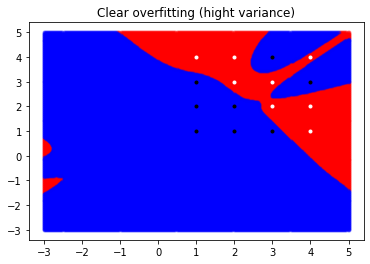

In [ ]:
nn = RegularizedNeuralNetwork(layers_size = np.array([2, 10, 10, 10, 1]), lr = 0.01, lambd = 0)
nn.fit(features_train, labels_train)

plot_decision_boundary(nn, fit_verdict = 'Clear overfitting (hight variance)',
                       features_test = features_train, labels_test = labels_train)

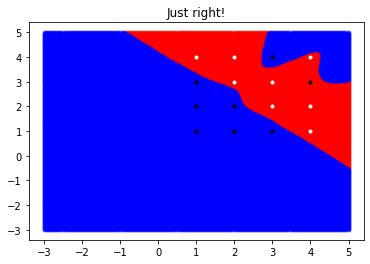

In [ ]:
R_nn = RegularizedNeuralNetwork(layers_size = np.array([2, 10, 10, 10, 1]), lr = 0.01, lambd = 0.0002)
R_nn.fit(features_train, labels_train)

plot_decision_boundary(R_nn, fit_verdict = 'Just right!', features_test = features_train, labels_test = labels_train)

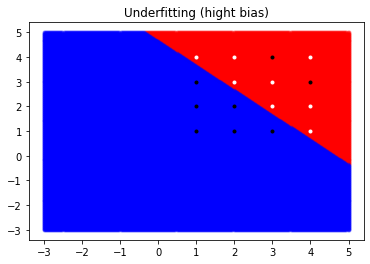

In [ ]:
SuperR_nn = RegularizedNeuralNetwork(layers_size = np.array([2, 10, 10, 10, 1]), lr = 0.01, lambd = 0.001)
SuperR_nn.fit(features_train, labels_train)

plot_decision_boundary(SuperR_nn, fit_verdict = 'Underfitting (hight bias)',
                       features_test = features_train, labels_test = labels_train)

Real dataset

In [ ]:
df = pd.read_csv('HW_Week6-RegularizedNeuralNetwork_data.csv', index_col = [0])
df

,exam1,exam2,admited?
0,34.623660,78.024693,0.0
1,30.286711,43.894998,0.0
2,35.847409,72.902198,0.0
3,60.182599,86.308552,1.0
4,79.032736,75.344376,1.0
...,...,...,...
95,83.489163,48.380286,1.0
96,42.261701,87.103851,1.0
97,99.315009,68.775409,1.0
98,55.340018,64.931938,1.0


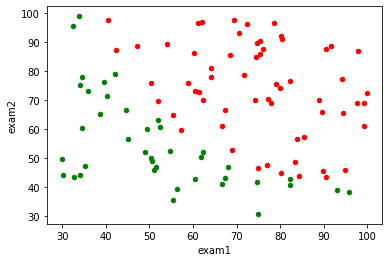

In [ ]:
df1 = df[df['admited?'] == 0]
df2 = df[df['admited?'] == 1]
ax = df1.plot.scatter(x = 'exam1', y = 'exam2', c = 'g')
df2.plot.scatter(x = 'exam1', y = 'exam2', c = 'r', ax = ax)
plt.show()

In [ ]:
def data_split(df, test_size):
    df = df.sample(frac=1).reset_index(drop=True)

    features, labels = df.iloc[ : , : -1 ], df.iloc[ : , [-1] ]

    features = (features - features.mean()) / features.std()

    features, labels = features.to_numpy(), labels.to_numpy()

    features_train, features_test = features[ : -test_size , : ], features[ -test_size : , : ]
    labels_train, labels_test = labels[ : -test_size , : ], labels[ -test_size : , : ]
    
    return [features_train, features_test, labels_train, labels_test]

In [ ]:
features_train, features_test, labels_train, labels_test = data_split(df, 1)

Real_Rnn = RegularizedNeuralNetwork(layers_size = np.array([2, 50, 50, 50, 1]), lr = 0.001, lambd = 0.001)
Real_Rnn.fit(features_train, labels_train)

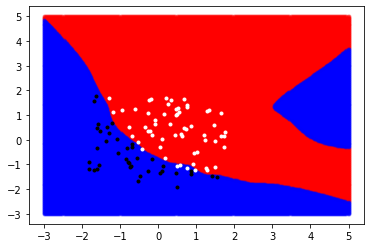

In [ ]:
plot_decision_boundary(Real_Rnn, fit_verdict = '',
                       features_test = features_train, labels_test = labels_train)

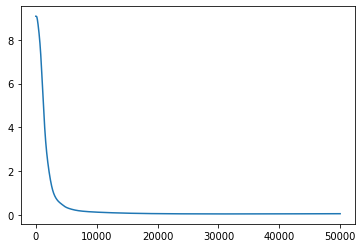

In [ ]:
story = Real_Rnn.get_story()
x = np.arange(len(story))
plt.plot(x, story)
plt.show()